In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [31]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [32]:
print('Shape of the training data',x_train.shape)
print('Shape of the test data',x_test.shape)

Shape of the training data (60000, 28, 28)
Shape of the test data (10000, 28, 28)


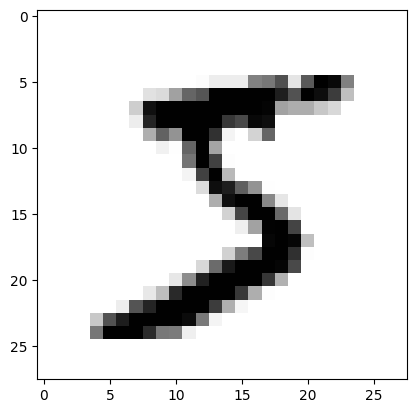

5


In [33]:
plt.imshow(x_train[0],cmap='binary')
plt.show()

print(y_train[0])

## Encoding the labels using one hot encoding

In [34]:
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [35]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
x_train=np.reshape(x_train,(60000,784))
x_test=np.reshape(x_test,(10000,784))

print(x_train.shape)

(60000, 784)


### Data Normalization

In [37]:
print(set(x_train[0]))


{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [38]:
x_mean=np.mean(x_train)
x_std=np.std(x_train)

x_train=(x_train-x_mean)/(x_std+1e-10)


In [39]:
print(set(x_train[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

In [40]:
x_test=(x_test-x_mean)/(x_std+1e-10)


## Modeling

In [41]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])



In [42]:
model.compile(
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train,y_train_encoded,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3747 - accuracy: 0.8919
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1787 - accuracy: 0.9485
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1351 - accuracy: 0.9600
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1094 - accuracy: 0.9678
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.9731


In [44]:
loss, accuracy=model.evaluate(x_test,y_test_encoded)


313/313 [==============================] - 1s 2ms/step - loss: 0.1072 - accuracy: 0.9650


In [45]:
predicted=model.predict(x_test)


In [46]:
(x_train2,y_train2),(x_test2,y_test2)=mnist.load_data()

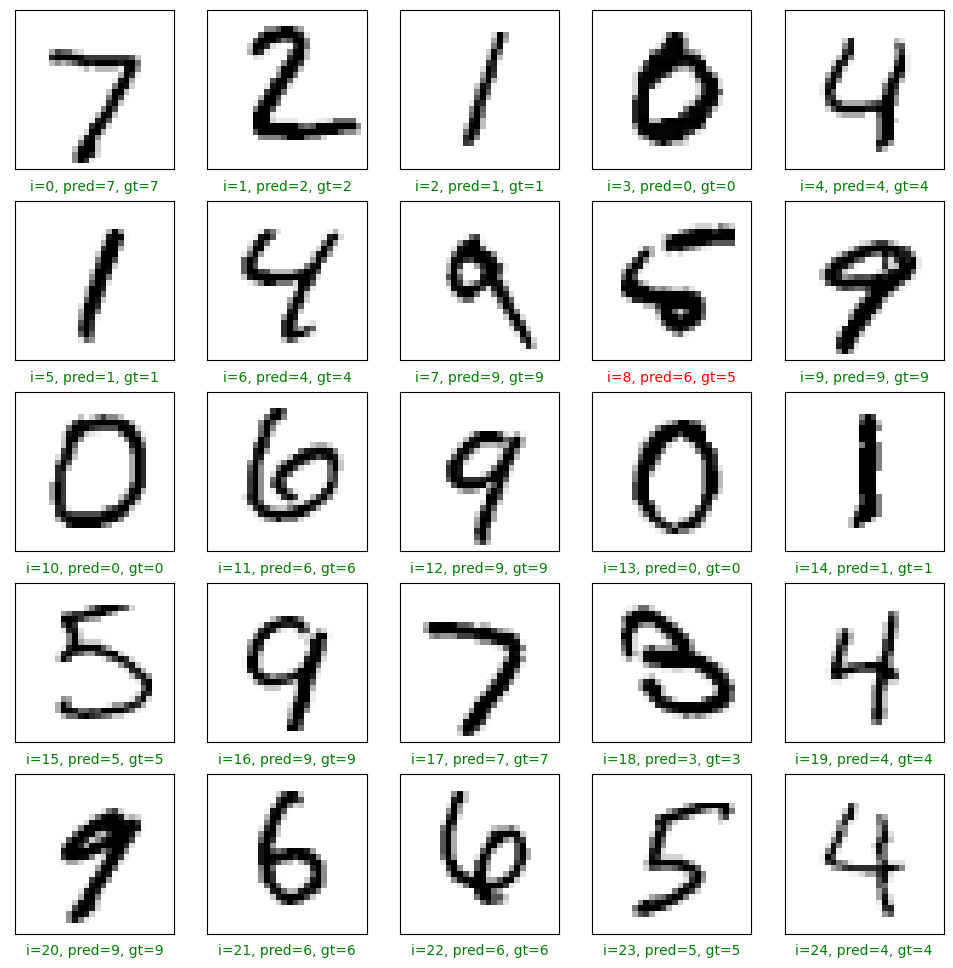

In [50]:


plt.figure(figsize=(12,12))
start_index=25
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(predicted[start_index+i])
    gt=y_test[start_index+i]
    col='g'
    if pred!=gt:
        col='r'
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test2[start_index+i],cmap='binary')
plt.show()